# 機器學習應用_第一組-1 Portuguese banking institution
https://www.kaggle.com/datasets/yufengsui/portuguese-bank-marketing-data-set/data?select=bank-full.csv

https://archive.ics.uci.edu/dataset/222/bank+marketing

該資料集涉及一家葡萄牙銀行機構從2008 年5 月到2010 年11 月期間開展的行銷活動，旨在促進現有客戶是否會認購定期存款。

# Feature

  1 - 年齡（數字）

  2 - 工作：工作類型（類別：「管理者」、「未知」、「失業」、「管理」、「女傭」、「企業家」、「學生」、
                                        「藍領」、「自營」、「退休」、「技術員」、「服務」）

  3 - 婚姻：婚姻狀況（類別：「已婚」、「離婚」、「單身」；註：「離婚」指離婚或喪偶）

  4 - 教育（類別：「未知」、「中學」、「小學」、「高等教育」）

  5 - 違約：是否有信用違約？ （二進位：“是”，“否”）

  6 - 餘額：平均年度餘額，以歐元為單位（數字）

  7 - 住房：有房屋貸款嗎？ （二進位：“是”，“否”）

  8 - 貸款：有個人貸款嗎？ （二進位：“是”，“否”）

  9 - 聯絡人：聯絡人通訊類型（類別：「未知」、「電話」、「行動網路」）

  10 - 天：該月的最後一次聯繫日（數字）

  11 - 月：一年中最後一次聯繫的月份（分類：「jan」、「feb」、「mar」、...、「nov」、「dec」）

  12 - 持續時間：最後一次聯繫持續時間，以秒為單位（數字）

  13 - 活動：在此活動期間以及為此客戶進行的聯繫次數（數字，包括最後一次聯繫）

  14 - pdays：上次活動最後一次聯絡客戶後經過的天數（數字，-1 表示之前未聯絡客戶）

  15 - 上一個：在此活動之前以及為此客戶執行的聯繫次數（數字）

  16 - poutcome：先前行銷活動的結果（類別：「未知」、「其他」、「失敗」、「成功」）






# Label

17 - y - 顧客是否已認購定期存款？ （二進位：“是”，“否”）

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/大三/下學期/機器學習應用/Datasets/ Bank Marketing")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering import
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder ,OrdinalEncoder ,StandardScaler
from imblearn.over_sampling import SMOTE

# Model import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
import xgboost as xgb
from xgboost import XGBClassifier ,XGBRegressor
from sklearn.svm import SVC ,SVR
from sklearn.neighbors import KNeighborsClassifier ,KNeighborsRegressor

# Evaluate import
from sklearn import metrics
from sklearn.metrics import accuracy_score ,precision_score ,recall_score ,f1_score ,roc_auc_score ,roc_curve ,classification_report ,confusion_matrix
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error ,explained_variance_score

# sns.set(style="whitegrid")
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
plt.rcParams['axes.unicode_minus'] = False # 正常顯示負號

# EDA
讀取資料，做資料探索

In [97]:
df = pd.read_csv("./bank-full.csv" ,sep =';')

df # 45211 rows × 17 columns

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.info()

In [ ]:
# Numerical statistics
df.describe()

In [ ]:
# Object statistics
df.describe(include=['object'])

# Missing Value

<Axes: >

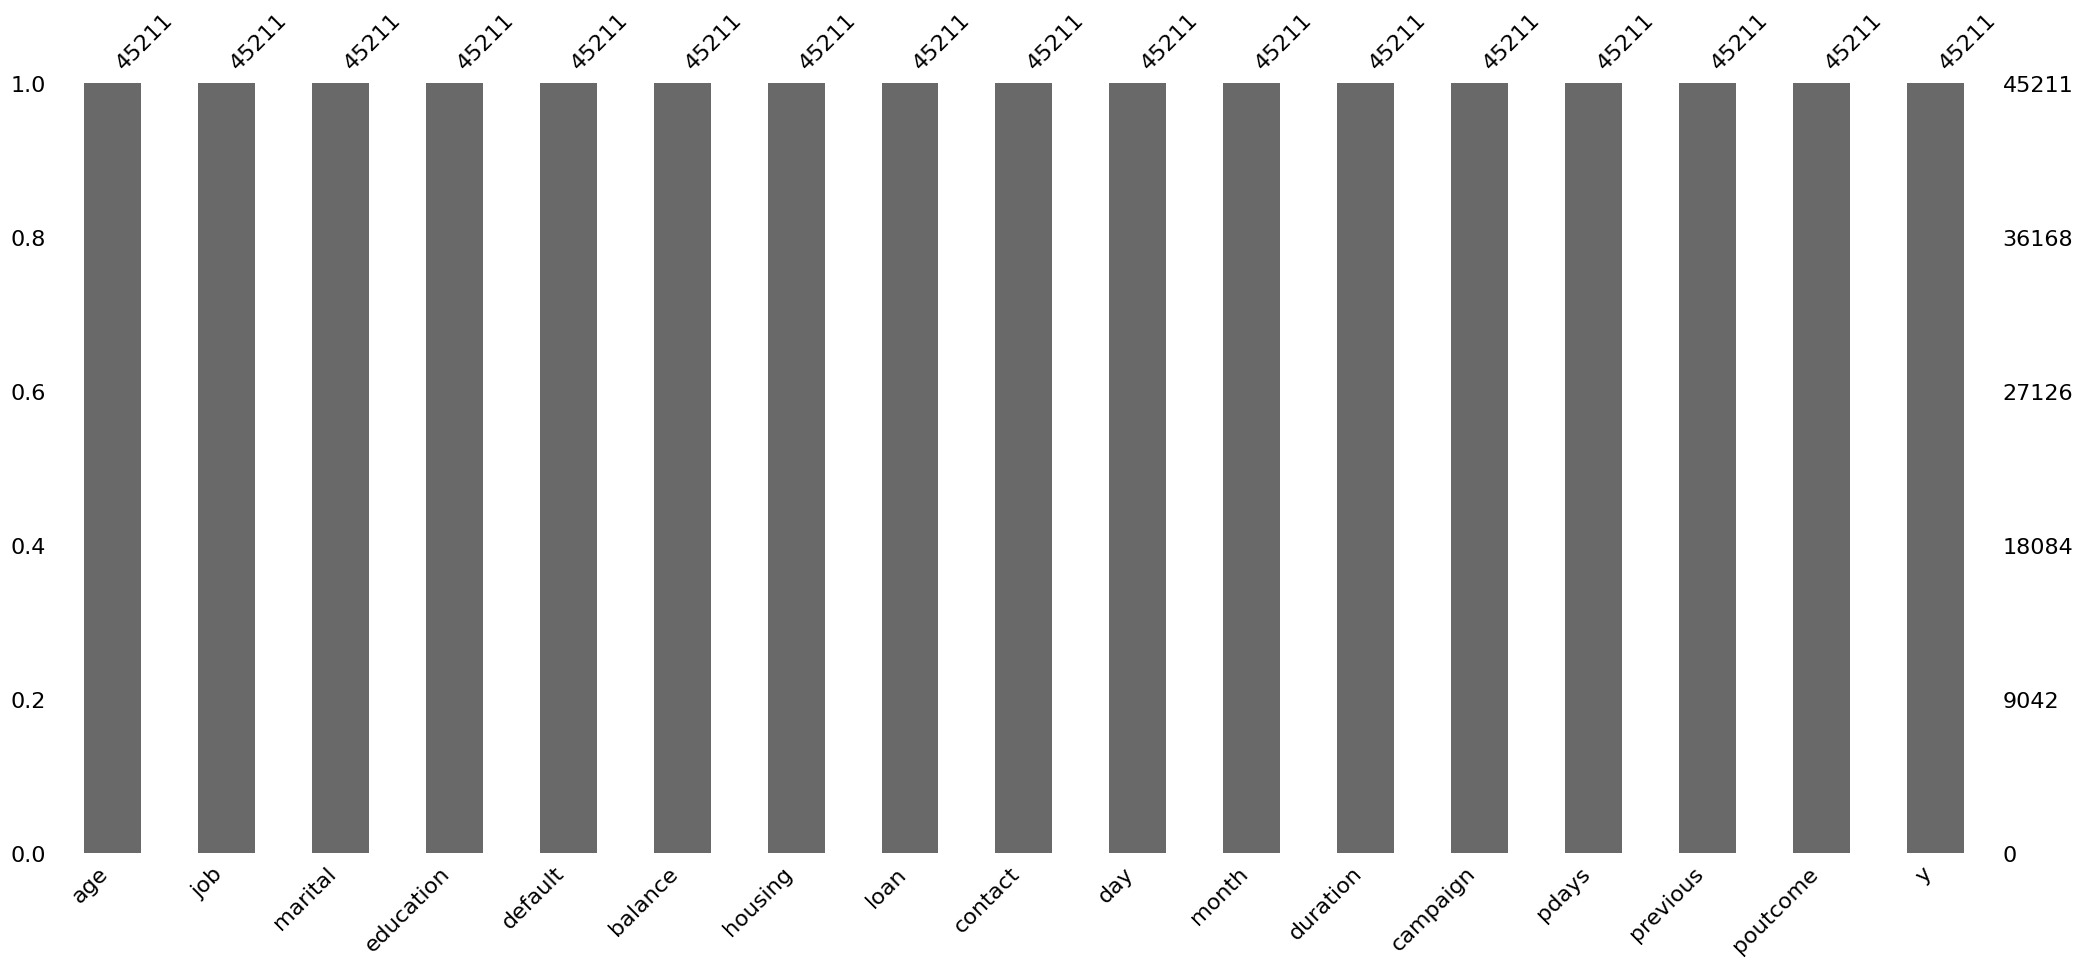

In [ ]:
import missingno as msno

msno.bar(df)

In [ ]:
msno.matrix(df)

圖表顯示，該資料集無缺失值

In [ ]:
df.nunique()

In [ ]:
# for column in df.columns:
#     print(f"Unique values in {column}: {df[column].unique()}")

categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}") # 列出唯一值

# Plot

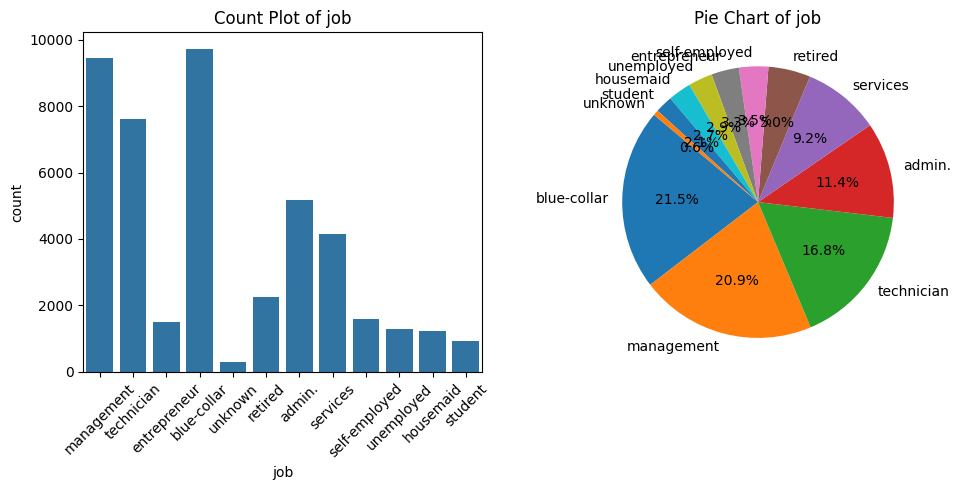

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


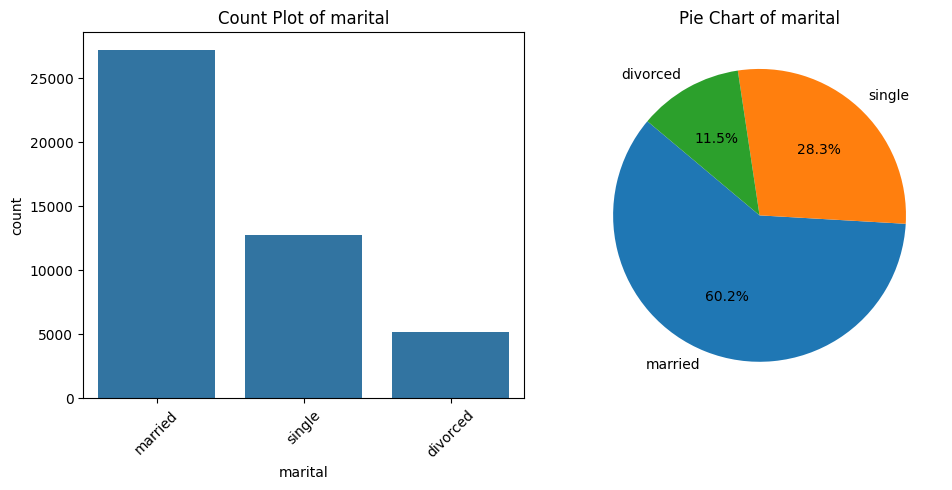

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


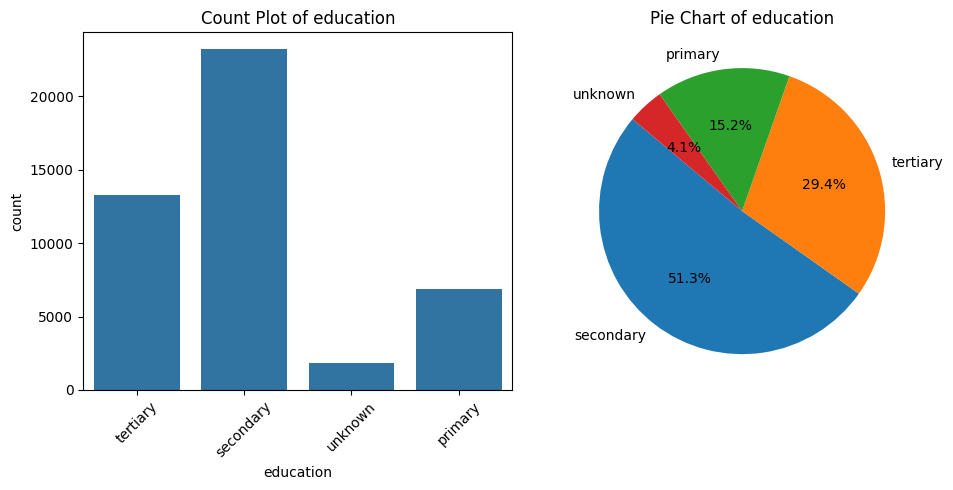

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


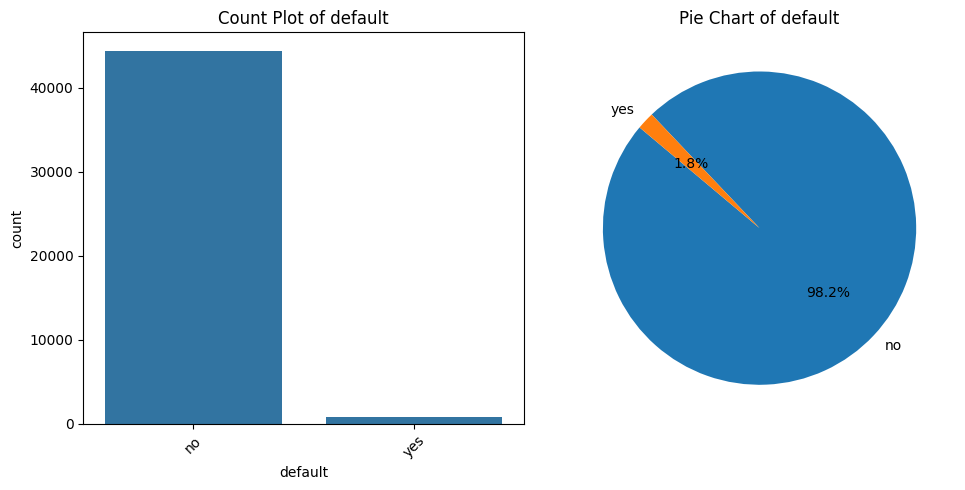

default
no     44396
yes      815
Name: count, dtype: int64


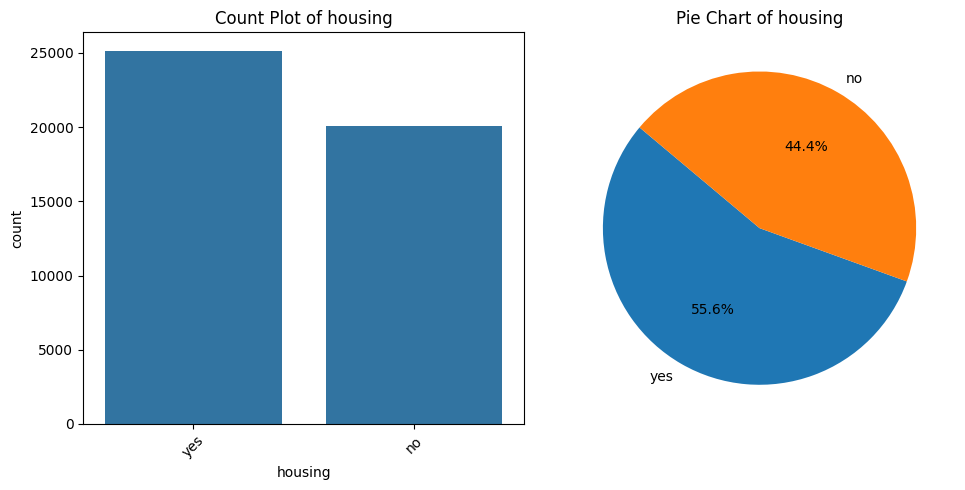

housing
yes    25130
no     20081
Name: count, dtype: int64


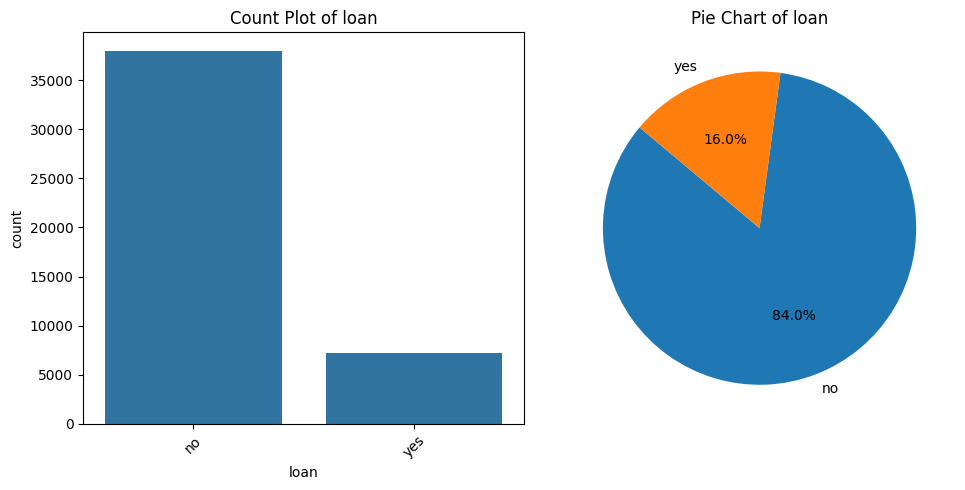

loan
no     37967
yes     7244
Name: count, dtype: int64


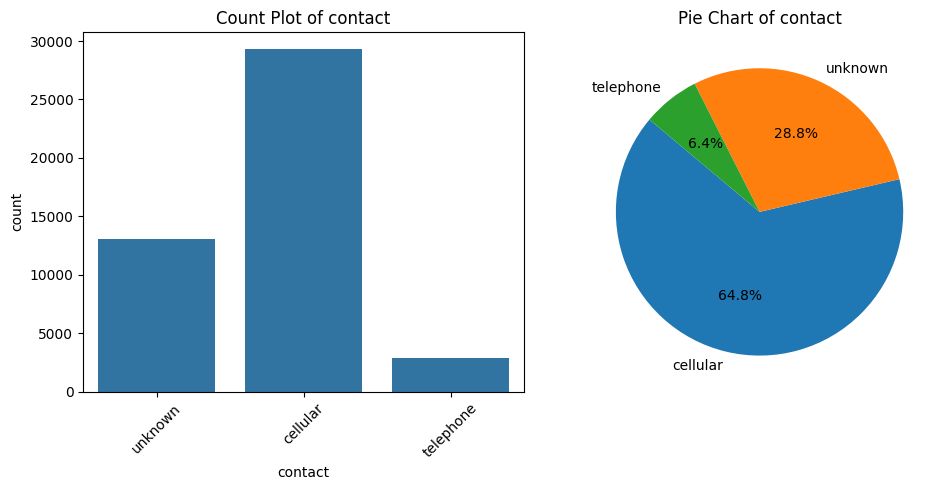

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


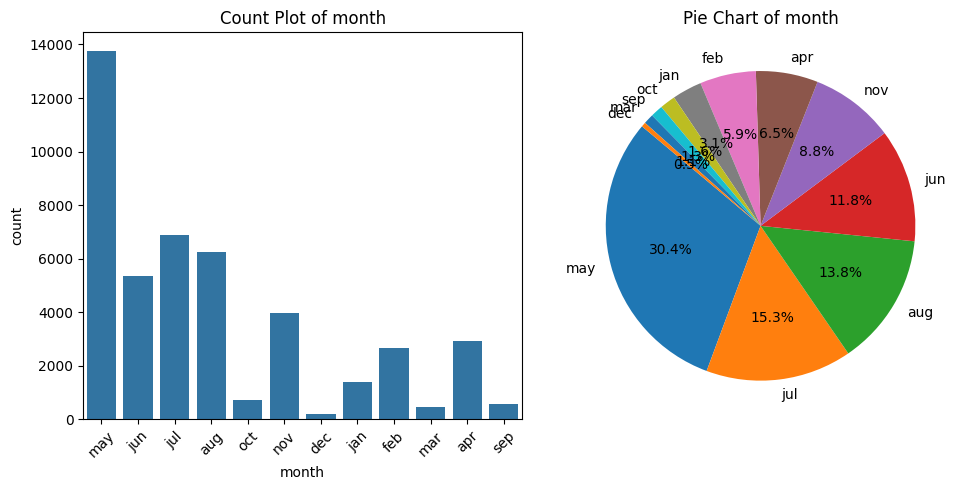

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


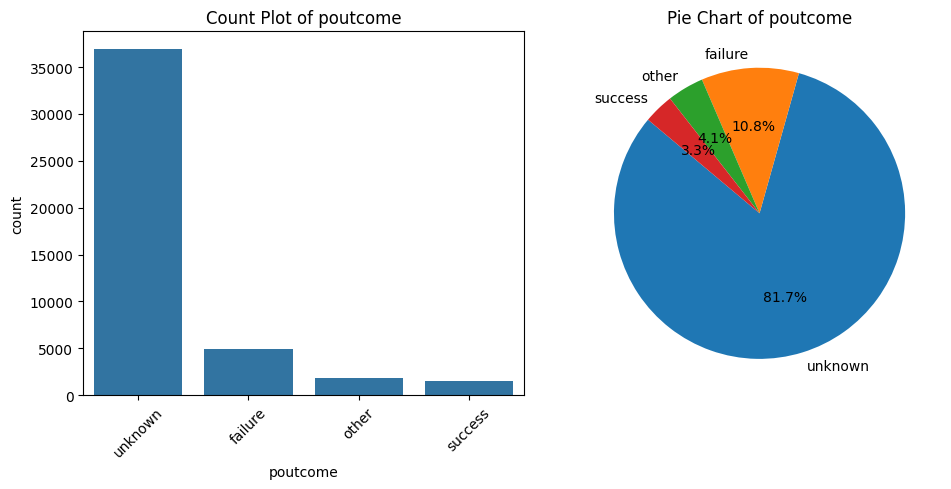

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


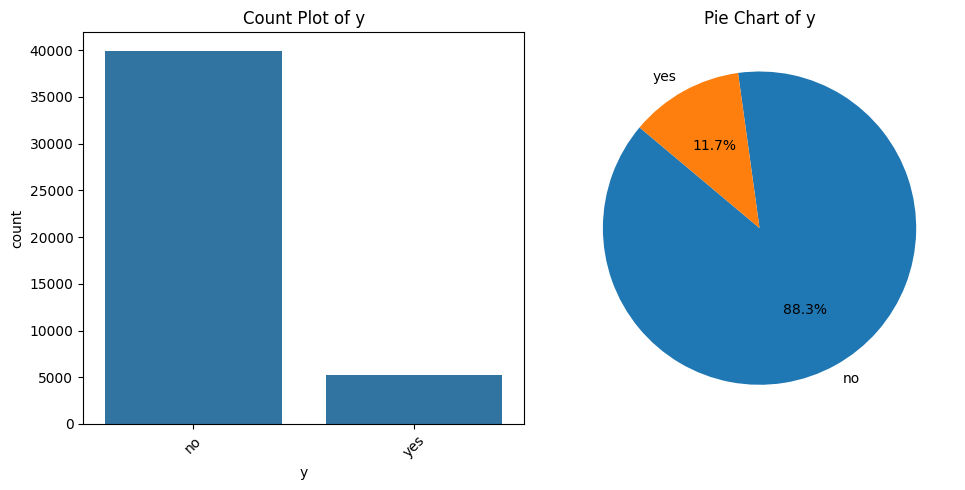

y
no     39922
yes     5289
Name: count, dtype: int64


In [ ]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    profile_counts = df[col].value_counts()
    plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {col}')
    plt.tight_layout()
    plt.show()
    print(df[col].value_counts())

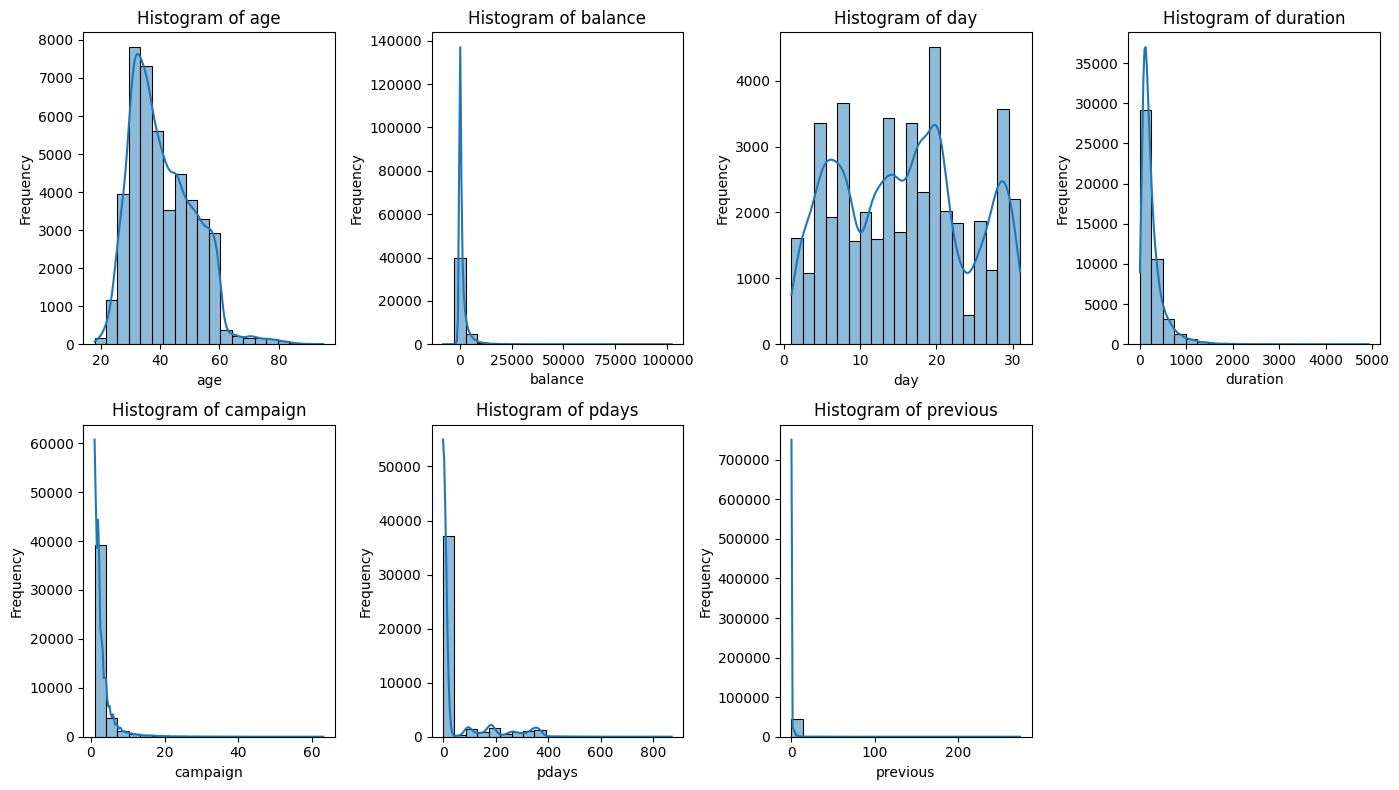

In [ ]:
numerical_columns = df.select_dtypes(include=['int','float']).columns

plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Scatter plot matrix 散點圖矩陣
sns.pairplot(df)

# Feature Engineering
刪除、替換特定欄位/類別，將特徵和標籤做轉換



In [98]:
# poutcome：先前行銷活動的結果，該欄位的unknown過多，因此決定刪除該欄位
delete_columns = ['poutcome']
df = df.drop(delete_columns, axis=1)

In [99]:
# 將 job、education 資料欄位裡的 'unknown' 替換成眾數
columns_to_process = ['job', 'education']

for column in columns_to_process:
    mode_value = df[column].mode()[0]
    df[column] = df[column].replace('unknown', mode_value)
for column in columns_to_process:
    print(f"\n{column.capitalize()} value counts after replacement:")
    print(df[column].value_counts())


Job value counts after replacement:
job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64

Education value counts after replacement:
education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64


In [100]:
# 對 contact 欄位進行 OneHotEncoder 處理，然後將contact_unknow刪除掉
df = pd.get_dummies(df, columns=['contact'], prefix='contact')
df = df.drop(columns=['contact_unknown'])
df # 45211 rows × 17 columns

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,contact_cellular,contact_telephone
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no,False,False
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no,False,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no,False,False
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,no,False,False
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,no,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes,True,False
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes,True,False
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes,True,False
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no,False,True


In [ ]:
use_columns = ['y']
df_copy = df.copy()
label_encoder = LabelEncoder()
for col in use_columns:
    df_copy[col + '_encoded'] = label_encoder.fit_transform(df[col])
    original_values = df_copy[col].unique()
    encoded_values = df_copy[col + '_encoded'].unique()
    print(f"Original values for column '{col}': {original_values}")
    print(f"Encoded values for column '{col}': {encoded_values}")
    print()

In [ ]:
# df_copy

In [ ]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns
or_encoder = OrdinalEncoder()
df_copy = df.copy()
or_encoder = OrdinalEncoder()

for col in categorical_columns:
  df_copy[categorical_columns + '_encoded'] = or_encoder.fit_transform(df[categorical_columns])
  original_values = df[col].unique()
  encoded_values = df_copy[col + '_encoded'].unique()
  print(f"Original values for column '{col}': {original_values}")
  print(f"Encoded values for column '{col}_encoded': {encoded_values}")
  print()

In [101]:
# 標籤y做LabelEncoder
lb_encoder = LabelEncoder()
df['y'] = lb_encoder.fit_transform(df['y'])
# Original values for column 'y': ['no' 'yes']
# Encoded values for column 'y': [0 1]

# 類別特徵欄位做OrdinalEncoder
categorical_columns = df.select_dtypes(include=['object','bool']).columns
or_encoder = OrdinalEncoder()
df[categorical_columns] = or_encoder.fit_transform(df[categorical_columns])

LabelEncoder，此轉換器應用於對目標值（即 y）進行編碼

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

==============================================================================

OrdinalEncoder，官方文件中建議 x 項的輸入特徵可以採用 OrdinalEncoder

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

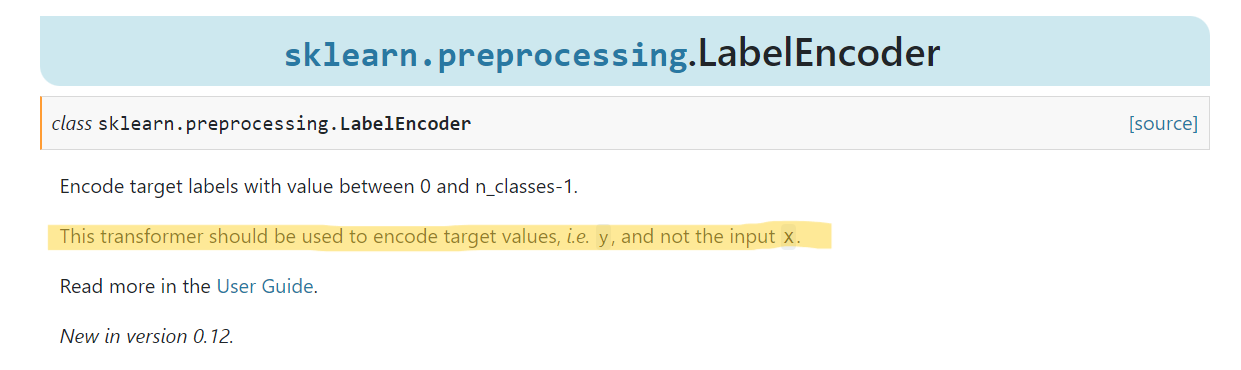

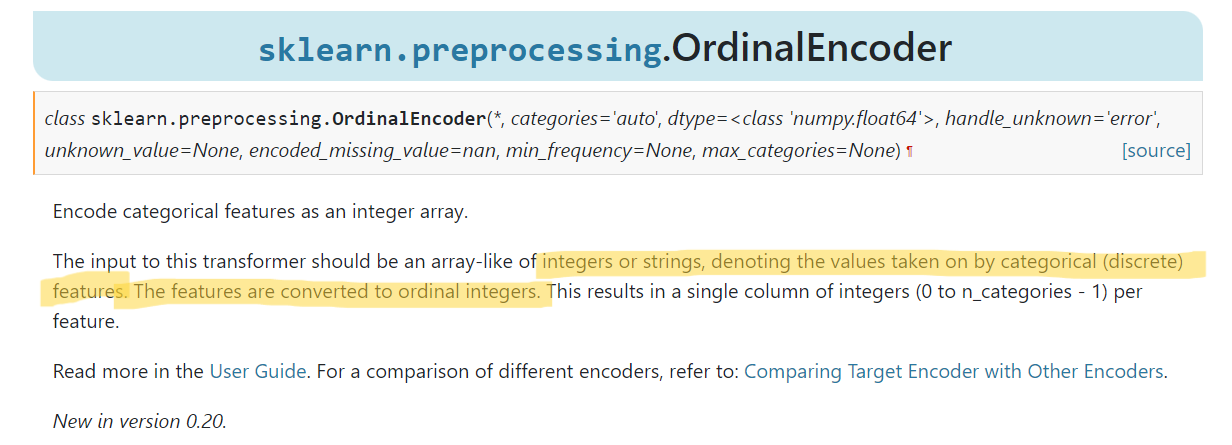

In [102]:
df # 45211 rows × 17 columns

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,contact_cellular,contact_telephone
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,5,8.0,261,1,-1,0,0,0.0,0.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,5,8.0,151,1,-1,0,0,0.0,0.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,5,8.0,76,1,-1,0,0,0.0,0.0
3,47,1.0,1.0,1.0,0.0,1506,1.0,0.0,5,8.0,92,1,-1,0,0,0.0,0.0
4,33,1.0,2.0,1.0,0.0,1,0.0,0.0,5,8.0,198,1,-1,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,17,9.0,977,3,-1,0,1,1.0,0.0
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,17,9.0,456,2,-1,0,1,1.0,0.0
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,17,9.0,1127,5,184,3,1,1.0,0.0
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,17,9.0,508,4,-1,0,0,0.0,1.0


In [104]:
df.to_csv('bank_handled.csv' ,index=False)

# Hetmap
熱力圖,顯示欄位間的相關性

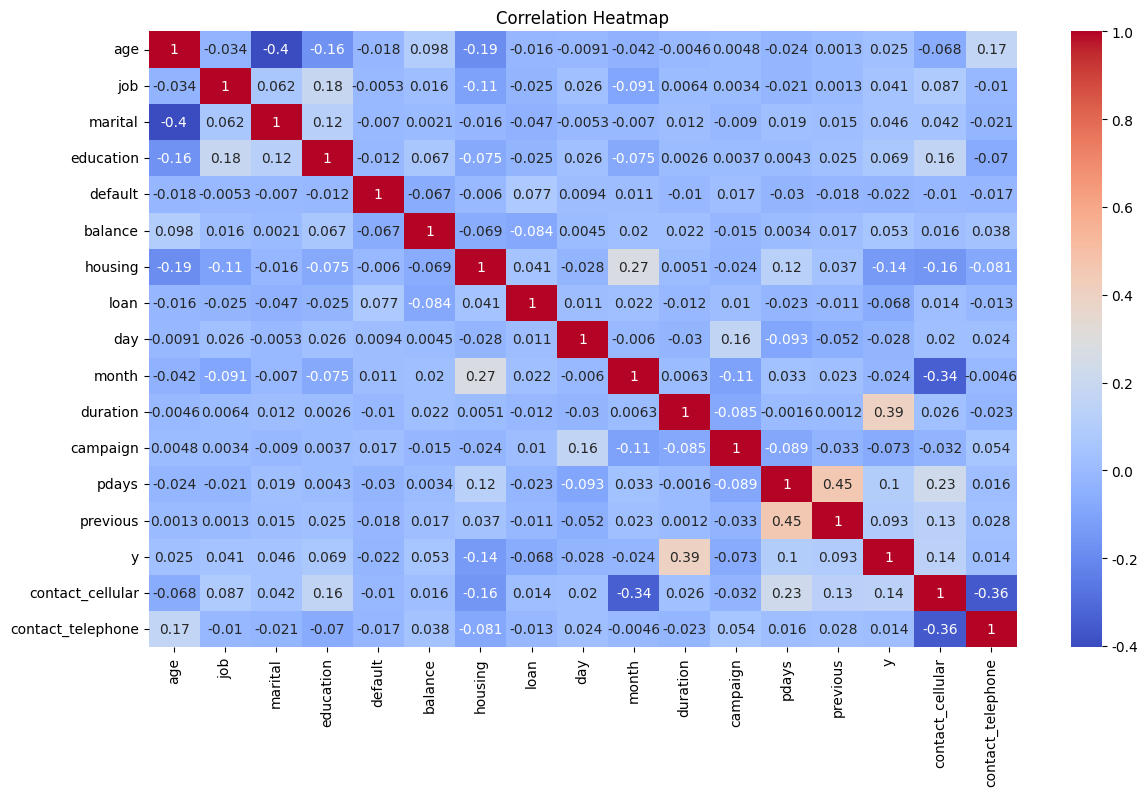

In [ ]:
corr = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr

In [ ]:
correlation_matrix = df.corr().abs()
top_correlations = correlation_matrix['y'].sort_values(ascending=False).head(10)
print(top_correlations)

# Train Test Split
資料分割，將資料集拆分為訓練集和測試集，針對訓練集的數值特徵做標準化然後做異常值處理

In [ ]:
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('='*30)
# 查看全部資料的類別比例
print(pd.Series(y).value_counts(normalize=True))
# 查看訓練集標籤的分佈
print(pd.Series(y_train).value_counts(normalize=True))
# 查看測試集標籤的分佈
print(pd.Series(y_test).value_counts(normalize=True))

X_train: (31647, 16)
X_test: (13564, 16)
y_train: (31647,)
y_test: (13564,)
y
0    0.88
1    0.12
Name: proportion, dtype: float64
y
0    0.88
1    0.12
Name: proportion, dtype: float64
y
0    0.88
1    0.12
Name: proportion, dtype: float64


In [ ]:
from collections import Counter

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 27956, 1: 3691})
Testing target statistics: Counter({0: 11966, 1: 1598})


In [ ]:
numeric_cols = X_train.select_dtypes(include=['int','float']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols]) # 在測試集上做相同的轉換

如果在測試集上使用fit_transform，那測試集會使用它自己的平均值和標準差進行轉換，這會導致訓練和測試的資料分布不一致

In [ ]:
X_train # 31647 rows × 16 columns

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,contact_cellular,contact_telephone
10747,-4.65e-01,1.46,1.37,1.33,-0.14,-0.46,-1.12,-0.44,0.14,0.16,-0.40,0.39,-0.41,-0.24,-1.36,-0.26
26054,1.42e+00,-0.70,-0.28,-0.21,-0.14,-0.39,-1.12,-0.44,0.38,1.16,0.21,0.07,-0.41,-0.24,0.74,-0.26
9125,4.76e-01,-1.01,-0.28,-0.21,-0.14,-0.46,0.89,-0.44,-1.30,0.16,-0.67,-0.24,-0.41,-0.24,-1.36,-0.26
41659,5.49e-03,-0.08,-1.93,1.33,-0.14,0.69,-1.12,-0.44,-1.78,1.49,0.17,-0.56,0.78,1.81,0.74,-0.26
4443,-2.77e-01,-1.01,-0.28,-0.21,-0.14,-0.46,0.89,-0.44,0.50,0.82,-0.65,-0.56,-0.41,-0.24,-1.36,-0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2.88e-01,-0.39,1.37,-1.75,-0.14,-0.10,-1.12,-0.44,0.26,0.16,7.09,-0.56,-0.41,-0.24,-1.36,-0.26
44732,-1.69e+00,1.15,1.37,1.33,-0.14,-0.29,-1.12,-0.44,-0.94,1.82,-0.18,-0.56,0.51,0.17,0.74,-0.26
38158,-6.53e-01,1.46,-1.93,1.33,-0.14,-0.01,0.89,-0.44,-0.10,0.82,-0.07,-0.56,-0.41,-0.24,0.74,-0.26
860,-7.47e-01,0.23,-0.28,-0.21,-0.14,-0.40,-1.12,-0.44,-1.06,0.82,-0.57,-0.56,-0.41,-0.24,-1.36,-0.26


In [ ]:
X_train[numeric_cols].describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,contact_cellular,contact_telephone
count,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04
mean,1.69e-16,3.82e-17,-2.16e-17,1.38e-16,-1.12e-18,6.96e-18,-9.79e-17,-3.77e-17,-6.96e-17,3.19e-17,8.98e-19,8.37e-17,3.84e-17,-1.89e-17,-8.87e-17,-8.69e-17
std,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
min,-2.16e+00,-1.32e+00,-1.93e+00,-1.75e+00,-1.41e-01,-2.76e+00,-1.12e+00,-4.37e-01,-1.78e+00,-1.84e+00,-9.95e-01,-5.62e-01,-4.11e-01,-2.41e-01,-1.36e+00,-2.62e-01
25%,-7.47e-01,-1.01e+00,-2.78e-01,-2.13e-01,-1.41e-01,-4.33e-01,-1.12e+00,-4.37e-01,-9.41e-01,-8.40e-01,-5.97e-01,-5.62e-01,-4.11e-01,-2.41e-01,-1.36e+00,-2.62e-01
50%,-1.83e-01,-8.09e-02,-2.78e-01,-2.13e-01,-1.41e-01,-3.06e-01,8.94e-01,-4.37e-01,2.05e-02,1.59e-01,-3.00e-01,-2.45e-01,-4.11e-01,-2.41e-01,7.35e-01,-2.62e-01
75%,6.64e-01,8.46e-01,1.37e+00,1.33e+00,-1.41e-01,2.55e-02,8.94e-01,-4.37e-01,6.21e-01,8.25e-01,2.37e-01,7.22e-02,-4.11e-01,-2.41e-01,7.35e-01,-2.62e-01
max,5.08e+00,1.77e+00,1.37e+00,1.33e+00,7.12e+00,2.68e+01,8.94e-01,2.29e+00,1.82e+00,1.82e+00,1.80e+01,1.91e+01,8.25e+00,1.13e+02,7.35e-01,3.81e+00


圖表可以看到經過標準化的處理後，訓練集的平均值趨近於0，方差為1

In [ ]:
X_test # 13564 rows × 16 columns

In [ ]:
X_test[numeric_cols].describe()

In [ ]:
def remove_outliers(df, cols, threshold=3):
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

X_train_no_outliers = remove_outliers(pd.DataFrame(X_train, columns=numeric_cols), numeric_cols)
y_train_no_outliers = y_train[X_train_no_outliers.index]

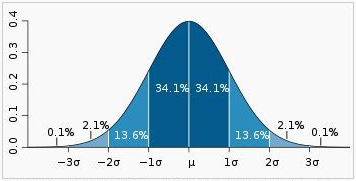

In [ ]:
X_train_no_outliers # 31647 rows × 16 columns ---> 26108 rows × 16 columns

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,contact_cellular,contact_telephone
10747,-4.65e-01,1.46,1.37,1.33,-0.14,-0.46,-1.12,-0.44,0.14,0.16,-0.40,0.39,-0.41,-0.24,-1.36,-0.26
26054,1.42e+00,-0.70,-0.28,-0.21,-0.14,-0.39,-1.12,-0.44,0.38,1.16,0.21,0.07,-0.41,-0.24,0.74,-0.26
9125,4.76e-01,-1.01,-0.28,-0.21,-0.14,-0.46,0.89,-0.44,-1.30,0.16,-0.67,-0.24,-0.41,-0.24,-1.36,-0.26
41659,5.49e-03,-0.08,-1.93,1.33,-0.14,0.69,-1.12,-0.44,-1.78,1.49,0.17,-0.56,0.78,1.81,0.74,-0.26
4443,-2.77e-01,-1.01,-0.28,-0.21,-0.14,-0.46,0.89,-0.44,0.50,0.82,-0.65,-0.56,-0.41,-0.24,-1.36,-0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-8.41e-01,-1.32,1.37,-0.21,-0.14,-0.45,0.89,-0.44,1.34,0.82,-0.66,-0.24,-0.41,-0.24,-1.36,-0.26
44732,-1.69e+00,1.15,1.37,1.33,-0.14,-0.29,-1.12,-0.44,-0.94,1.82,-0.18,-0.56,0.51,0.17,0.74,-0.26
38158,-6.53e-01,1.46,-1.93,1.33,-0.14,-0.01,0.89,-0.44,-0.10,0.82,-0.07,-0.56,-0.41,-0.24,0.74,-0.26
860,-7.47e-01,0.23,-0.28,-0.21,-0.14,-0.40,-1.12,-0.44,-1.06,0.82,-0.57,-0.56,-0.41,-0.24,-1.36,-0.26


In [ ]:
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

# Feature Importance

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100 ,random_state=42)
rf_model.fit(X_train_no_outliers, y_train_no_outliers)

importances = rf_model.feature_importances_

feature_scores = pd.Series(importances, index=X_train_no_outliers.columns).sort_values(ascending=False)
# feature_scores

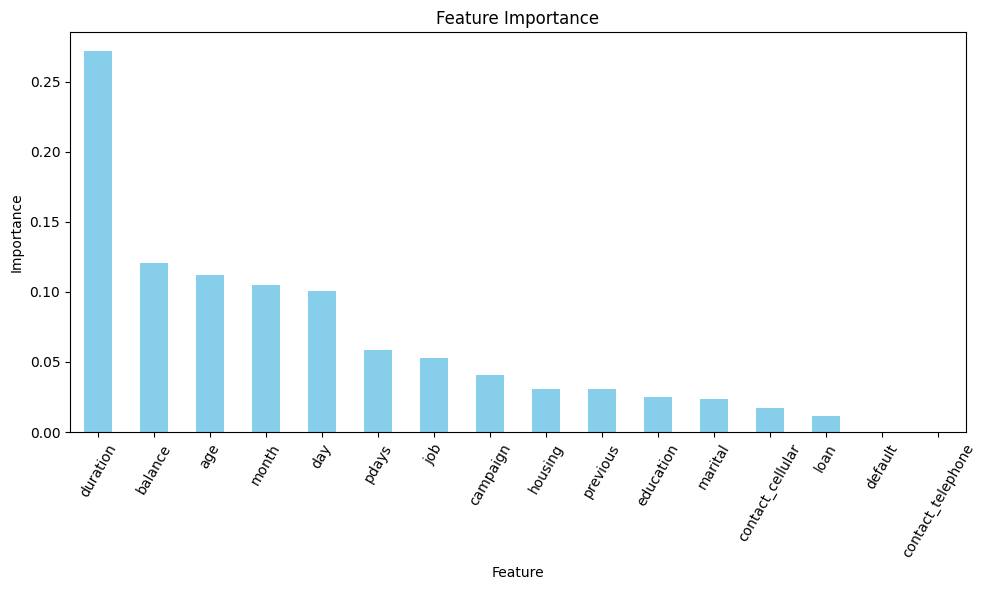

In [ ]:
plt.figure(figsize=(10, 6))
feature_scores.plot(kind='bar', color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [ ]:
feature_scores = pd.Series(importances, index=X_train_no_outliers.columns).sort_values(ascending=False)
top_50_percent_threshold = feature_scores.quantile(0.5)
top_features = feature_scores[feature_scores >= top_50_percent_threshold].index

X_train_no_outliers = X_train_no_outliers[top_features]
X_test = X_test[top_features]
print("Selected Features:")
print(top_features)

Selected Features:
Index(['duration', 'balance', 'age', 'month', 'day', 'pdays', 'job',
       'campaign'],
      dtype='object')


In [ ]:
X_train_no_outliers # 26108 rows × 8 columns

In [ ]:
X_test # 13564 rows × 8 columns

# Model Test

In [ ]:
# Bank
# 二.建立模型

# 三.更改方式
# change_1　SMOTE
# change_2　change_1 + feature_importance
# change_3 change_2 + 超參數

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_no_outliers, y_train_no_outliers)

Training Set Evaluation:
Accuracy: 0.9697410755324039
Precision: 0.9250574712643678
Recall: 0.7624100037893141
F1 Score: 0.8358953053593684
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23469
           1       0.93      0.76      0.84      2639

    accuracy                           0.97     26108
   macro avg       0.95      0.88      0.91     26108
weighted avg       0.97      0.97      0.97     26108

AUC:
0.877732335824522


Testing Set Evaluation:
Accuracy: 0.8981126511353583
Precision: 0.5878048780487805
Recall: 0.4524405506883605
F1 Score: 0.5113154172560114
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11966
           1       0.59      0.45      0.51      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.71      0.73     13564
weighted avg       0.89      0.90      0.89     135

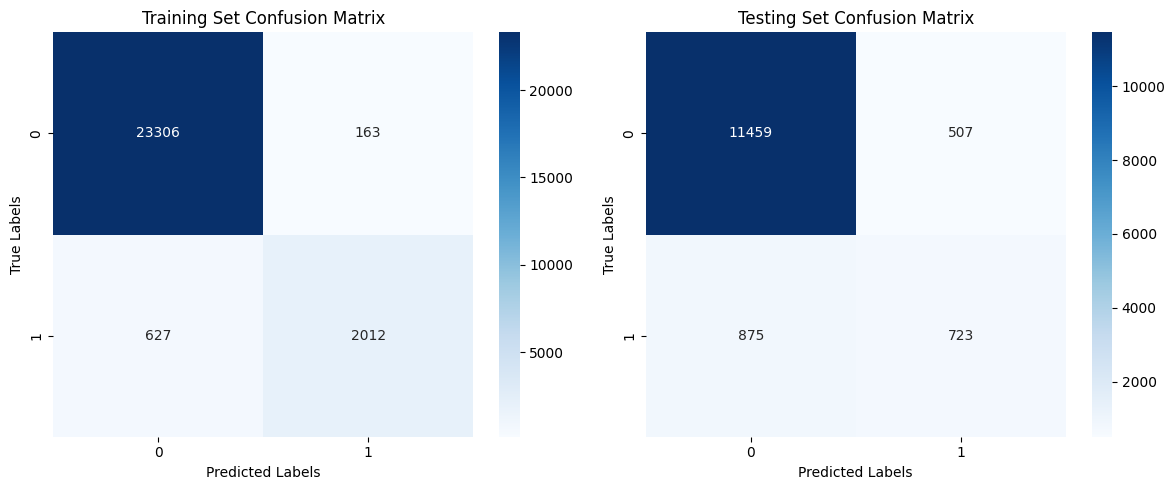

In [ ]:
def evaluate_model_performance(model, X_train, X_test, y_train, y_test):
    # 訓練集上的模型評分
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='binary')
    train_recall = recall_score(y_train, y_train_pred, average='binary')
    train_f1 = f1_score(y_train, y_train_pred, average='binary')
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_classification_report = classification_report(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_pred)
    print("Training Set Evaluation:")
    print("Accuracy:", train_accuracy)
    print("Precision:", train_precision)
    print("Recall:", train_recall)
    print("F1 Score:", train_f1)
    # print("Confusion Matrix:")
    # print(train_conf_matrix)
    print("Classification Report:")
    print(train_classification_report)
    print("AUC:")
    print(train_auc)
    print("\n")

    # 測試集上的模型評分
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='binary')
    test_recall = recall_score(y_test, y_test_pred, average='binary')
    test_f1 = f1_score(y_test, y_test_pred, average='binary')
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_classification_report = classification_report(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    print("Testing Set Evaluation:")
    print("Accuracy:", test_accuracy)
    print("Precision:", test_precision)
    print("Recall:", test_recall)
    print("F1 Score:", test_f1)
    # print("Confusion Matrix:")
    # print(test_conf_matrix)
    print("Classification Report:")
    print(test_classification_report)
    print("AUC:")
    print(test_auc)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Training Set Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    plt.subplot(1, 2, 2)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Testing Set Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()
evaluate_model_performance(xgb_model, X_train_no_outliers, X_test, y_train_no_outliers, y_test)

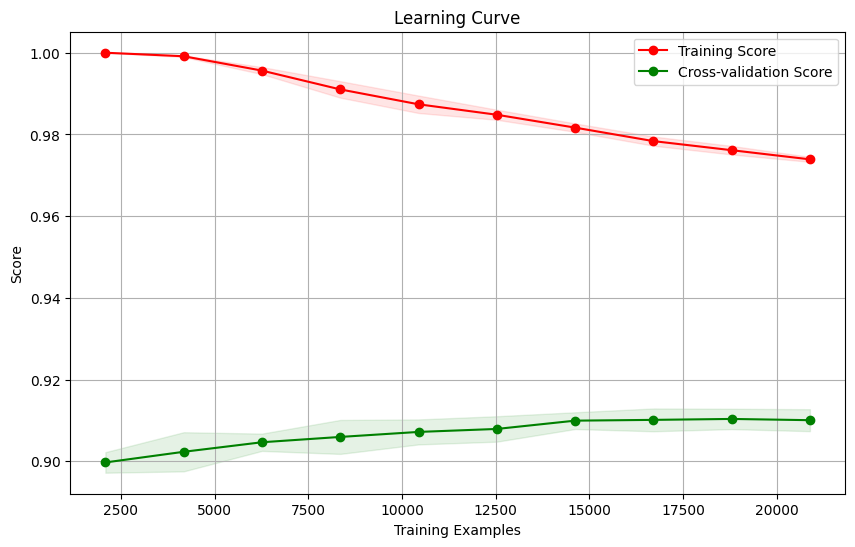

Train Sizes: [ 2088  4177  6265  8354 10443 12531 14620 16708 18797 20886]
Train Scores Mean: [1.         0.99913814 0.9956265  0.99102226 0.98737911 0.98482164
 0.98166895 0.97836964 0.97614513 0.97390597]
Test Scores Mean: [0.89972438 0.90232894 0.90466523 0.9059675  0.90719315 0.90792101
 0.90995092 0.91014244 0.91037232 0.91006592]


In [ ]:
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, n_jobs=-1)
    # Calculate the mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()

    # Print additional information
    print("Train Sizes:", train_sizes)
    print("Train Scores Mean:", train_scores_mean)
    print("Test Scores Mean:", test_scores_mean)
plot_learning_curve(xgb_model, X_train_no_outliers, y_train_no_outliers)

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_no_outliers, y_train_no_outliers)

In [ ]:
# X_resampled = X_resampled[top_features]
X_resampled # 46938 rows × 16 columns or 46938 rows × 8 columns

In [ ]:
y_resampled

In [ ]:
plt.figure(figsize=(10, 6))

profile_counts = y_resampled.value_counts()
plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('y Percentage')
plt.tight_layout()
plt.show()

print(y_resampled.value_counts()) # No:23469(50%) ,Yes:23469(50%)

In [ ]:
xgb_model.fit(X_resampled, y_resampled)
evaluate_model_performance(xgb_model, X_resampled, X_test, y_resampled, y_test)

In [ ]:
plot_learning_curve(xgb_model, X_resampled, y_resampled)

# 超參數調校

In [ ]:
xgb_model = XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.5, 1]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)
evaluate_model_performance(best_xgb_model, X_train, X_test, y_train, y_test)